# Introduction to Finance - Compilation Exercises: Introduction to Finance

### Description
This notebook contains a series of exercises designed to test your understanding of Class #1. We move from understanding **Sunk Costs** and **Accounting vs. Finance** differences, to calculating **Present Values**, and finally comparing investment projects.

In [1]:
# DO NOT MODIFY THIS SNIPPET
# Global Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Formatting for currency
pd.options.display.float_format = '${:,.2f}'.format
plt.style.use('seaborn-v0_8-whitegrid')

## Level 1: Conceptual Basics (Sunk Costs)

### Question
Your company has already spent **$10 million** developing a new energy drink, but tests show it tastes terrible. To fix the flavor and launch it, you need to spend an additional **$2 million**.

If you launch, expected sales (cash inflows) will be **$3 million** total. If you abandon the project now, you get **$0**.

**Should you spend the extra $2 million? Why?**

### Solution

**Answer: YES.**

**Reasoning:** 
* **Sunk Cost:** The $10 million is gone. It is a historical cost and irrelevant to the decision.
* **Marginal Cost:** $2 million (to fix).
* **Marginal Benefit:** $3 million (sales).

Since the marginal benefit ($3M) > marginal cost ($2M), you create $1M in value by proceeding. If you stop, you lose the opportunity to recover any value.

## Level 2: The "Mantra" (Time Value of Money)

### Question
You won a lottery. You are offered two options:
1.  Receive **$100,000** today.
2.  Receive **$115,000** exactly one year from today.

The current risk-free interest rate (your opportunity cost) is **18%**.

**Which option should you choose? Prove it with Python.**

In [2]:
# Solution Level 2

option_1_today = 100000
option_2_future = 115000
discount_rate = 0.18

# Calculate PV of Option 2
# Formula: PV = FV / (1 + r)^n
pv_option_2 = option_2_future / (1 + discount_rate)**1

print(f"Option 1 Value Today: ${option_1_today:,.2f}")
print(f"Option 2 Value Today: ${pv_option_2:,.2f}")

if option_1_today > pv_option_2:
    print("\nDecision: Choose Option 1 (Take the money now).")
else:
    print("\nDecision: Choose Option 2 (Wait one year).")

Option 1 Value Today: $100,000.00
Option 2 Value Today: $97,457.63

Decision: Choose Option 1 (Take the money now).


## Level 3: Profit vs. Cash Flow (The Trap)

### Question
A startup sells software subscriptions. In Year 1, the following happens:
1.  **Sales:** They sign contracts worth **$500,000**. Clients will pay in Year 2 (Credit).
2.  **Salaries:** They pay developers **$200,000** in cash.
3.  **Depreciation:** Their servers lose **$50,000** in value (accounting expense).

**Calculate:**
A) The Accounting Profit (Net Income).
B) The Net Cash Flow.

Is the company rich or bankrupt?

In [3]:
# Solution Level 3

# Inputs
sales_revenue = 500000  # Recognized revenue, but not received
cash_received = 0       # Because it's on credit

salary_expense = 200000
salary_paid = 200000    # Paid in cash

depreciation = 50000    # Non-cash expense

# A) Accounting Profit (Accrual Basis)
# Profit = Revenue - All Expenses
net_income = sales_revenue - salary_expense - depreciation

# B) Net Cash Flow (Cash Basis)
# Cash Flow = Cash In - Cash Out
net_cash_flow = cash_received - salary_paid

print(f"A) Accounting Net Income: ${net_income:,.2f}")
print(f"B) Net Cash Flow:         ${net_cash_flow:,.2f}")

print("\nConclusion: The company is profitable ($250k) but technically bankrupt (-$200k cash) unless it has savings!")

A) Accounting Net Income: $250,000.00
B) Net Cash Flow:         $-200,000.00

Conclusion: The company is profitable ($250k) but technically bankrupt (-$200k cash) unless it has savings!


## Level 4: Asset Valuation (Multiple Flows)

### Question
You are valuing a corporate bond (a debt contract). 
The terms are:
* It pays a coupon of **$50** at the end of Year 1, Year 2, and Year 3.
* At the end of Year 3, it also pays back the principal of **$1,000**.
* The appropriate discount rate (reflecting risk) is **6%**.

**What is the fair price (Value) of this bond today?**

In [4]:
# Solution Level 4

# Cash Flows [Year 1, Year 2, Year 3]
# Note: Year 3 includes $50 coupon + $1000 principal
cash_flows = [50, 50, 1050]
rate = 0.06

value = 0
print("Breakdown of Value:")
for t, cf in enumerate(cash_flows, 1):
    # PV = CF / (1+r)^t
    pv = cf / (1 + rate)**t
    value += pv
    print(f"Year {t} Flow: ${cf:,.0f} -> PV: ${pv:,.2f}")

print(f"\nTotal Fair Price of Bond: ${value:,.2f}")

Breakdown of Value:
Year 1 Flow: $50 -> PV: $47.17
Year 2 Flow: $50 -> PV: $44.50
Year 3 Flow: $1,050 -> PV: $881.60

Total Fair Price of Bond: $973.27


## Level 5: Challenge (Project Comparison)

### Question
You must choose between two machines:

**Machine A:** Generates **$3,000** every year for 5 years.  
**Machine B:** Generates nothing for 4 years, but pays a lump sum of **$20,000** in Year 5.

Assume a discount rate of **10%**.

1.  Which machine generates more total nominal cash (undiscounted)?
2.  Which machine is actually more valuable today (PV)?
3.  Plot the cumulative Present Value of both to see how value accumulates.

Machine A: Nominal Total = $15,000 | Present Value = $11,372.36
Machine B: Nominal Total = $20,000 | Present Value = $12,418.43

Winner: Machine B


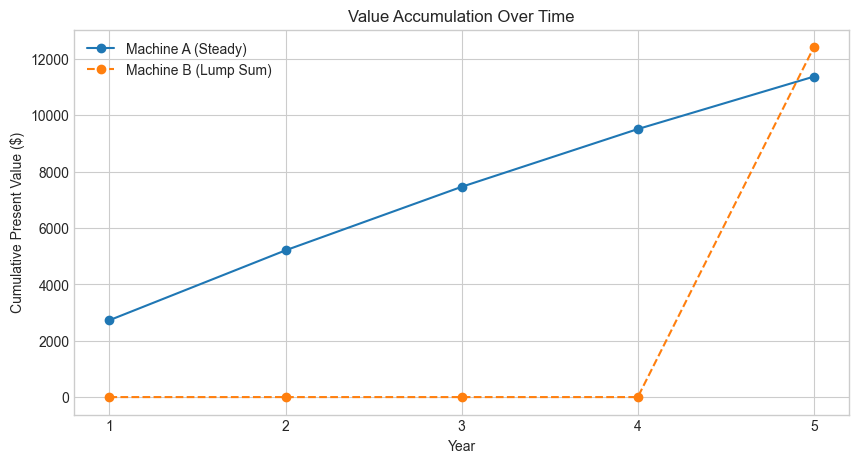

In [5]:
# Solution Level 5

rate = 0.10
years = np.arange(1, 6)

# Define Cash Flows
cf_A = np.array([3000, 3000, 3000, 3000, 3000])
cf_B = np.array([0, 0, 0, 0, 20000])

# 1. Nominal Totals
total_nominal_A = np.sum(cf_A)
total_nominal_B = np.sum(cf_B)

# 2. Calculate PVs for each year
pv_A_flows = cf_A / (1 + rate)**years
pv_B_flows = cf_B / (1 + rate)**years

total_val_A = np.sum(pv_A_flows)
total_val_B = np.sum(pv_B_flows)

print(f"Machine A: Nominal Total = ${total_nominal_A:,.0f} | Present Value = ${total_val_A:,.2f}")
print(f"Machine B: Nominal Total = ${total_nominal_B:,.0f} | Present Value = ${total_val_B:,.2f}")

if total_val_A > total_val_B:
    print("\nWinner: Machine A (Money sooner is better!)")
else:
    print("\nWinner: Machine B")

# 3. Plotting Cumulative Value Creation
cumulative_pv_A = np.cumsum(pv_A_flows)
cumulative_pv_B = np.cumsum(pv_B_flows)

plt.figure(figsize=(10, 5))
plt.plot(years, cumulative_pv_A, label='Machine A (Steady)', marker='o')
plt.plot(years, cumulative_pv_B, label='Machine B (Lump Sum)', marker='o', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Cumulative Present Value ($)')
plt.title('Value Accumulation Over Time')
plt.legend()
plt.xticks(years)
plt.show()